# Generative Adversarial Network Homework

This is the 5th assignment for CAP 4630 and we will implement the basic GAN with Keras and TensorFlow. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 points, including 15 bonus points)** \
You are **not** allowed to use Machine Learning libaries such as Scikit-learn.

**Task Overview:**
- Implement the GAN task with Keras

## 1 - Implement Generative Adversarial Network with Keras##
### 1.1 Prepare the data


**Tasks:**
1. Load the MNIST dataset and **print out the shape** of it **(5 Points)**
2. **Normalize the data** therefore every pixel value should be between 0 and 1. **(5 Points)**
3. **Define a load_real_batch function** which generates a random batch of real images and labels for the training. **(5 Points)**


**Hints:**  
1. Shape of Train data:(60000, 28, 28, 1)
2. The label of the real image should be 1.
3. The dimension of a batch of real images and labels (of batch size = 10) should be (10, 28, 28, 1) and
(10, 1).


In [ ]:
# 1. loading the mnist dataset and normalize it here
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot


### Set random seed to ensure deterministic results
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import numpy as np
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)
reset_random_seeds()

#### Refer to the example in Homework 3
#### 1.Load MNIST data; 
#### 2. Reshape them by expanding to 3d; 
#### 3. Define the type to float32
#### 4. Scale them to [0,1]; 

from keras.datasets.mnist import load_data
### load the images into memory
### You may fill the blanks of dots ###

#(..., ...), (..., ...) = load_data() # load train and test data: (trainX, trainy) and (testX, testy)
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

def load_real_samples():
	### load mnist dataset
	(trainX, dummy), (dummy, dummy) = load_data() # only load trainX for real samples and other parameters are set to dummy variable
	### expand trainX to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1) 
	### convert X from unsigned ints to float32
	X = X.astype("float32")
	### scale X from [0,255] to [0,1]
	X = X.astype("float32") / 255
	return X


dataset = load_real_samples() # load real samples
print('dataset', dataset.shape) # print out the shape of dataset



11493376/11490434 [==============================] - 0s 0us/step
dataset (60000, 28, 28, 1)


In [ ]:
### 2. define load_real_batch() here
### You may fill the blanks of dots ###

def generate_real_samples(dataset, n_samples):
 	ix = randint(0, len(dataset), n_samples)	# choose random instances with randit(start=0, end=num of data, sample=n_samples)
 	X = dataset[ix] 	# retrieve selected images from indices of ix
 	y = ones((n_samples, 1)) # generate 'real' class labels (1), i.e., real image is labeled by 1. 
 	return X, y

sampleX,sampleY = generate_real_samples(dataset, 10) ### test the function with defined MNIST data and 10 samples
print(sampleX.shape) ### print shape X
print(sampleY.shape) ### print shape Y

(10, 28, 28, 1)
(10, 1)


### 1.2 - Build the Generative Adversarial Network (GAN) Model ##


Build the Generative Adversarial Network (GAN) with generator and discriminator. 

**Tasks:**
1. Build the generator.  **(10 Points)**
2. Build the discriminator.  **(10 Points)**

**Hints:**  
1. The shape of the generator should be: 
![image.png](attachment:image.png)
2. **The input shape of the generator should be: 100**

3. The shape of the discriminator should be: 

*   List item
*   List item


![image.png](attachment:image.png)
4. The output shape of the generator should be the input shape of the discriminator. Both of them should also be the size of the MNIST data (28 * 28 * 1).

In [ ]:
### define the generator model here ###
### You may fill the blanks of dots ###

def define_generator(latent_dim):
  model = Sequential()
### foundation for 7x7 image
  n_nodes = 6272 # num of nodes is 128 * 7 * 7
  model.add(Dense(n_nodes, input_dim=latent_dim)) # Dense(n_nodes, input_dim=latent_dim)
  model.add(LeakyReLU(alpha=0.2)) # LeakyReLU with alpha=0.2
  model.add(Reshape((7, 7, 128)))  # Reshape((7, 7, 128))
### upsample to 14x14
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) # Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')
  model.add(LeakyReLU(alpha=0.2)) # LeakyReLU with alpha=0.2
### upsample to 28x28
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) # Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')
  model.add(LeakyReLU(alpha=0.2)) # LeakyReLU with alpha=0.2
  model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same')) # Conv2D(1, (7,7), activation='sigmoid', padding='same')
  return model

In [ ]:
### define the discriminator model here ###
### You may fill the blanks of dots ###

def define_discriminator(in_shape=(28,28,1)):
  model = Sequential()
  model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=in_shape)) # Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape)
  model.add(LeakyReLU(alpha=0.2)) # LeakyReLU with alpha=0.2
  model.add(Dropout(0.4)) # Dropout(0.4)
  model.add(Conv2D(64, (3,3), strides=(2,2), padding='same')) # Conv2D(64, (3,3), strides=(2, 2), padding='same')
  model.add(LeakyReLU(alpha=0.2)) # LeakyReLU with alpha=0.2
  model.add(Dropout(0.4)) # Dropout(0.4)
  model.add(Flatten()) # Flatten()
  model.add(Dense(1, activation='sigmoid')) # Dense(1, activation='sigmoid')
### compile model ###
  opt = Adam(lr=0.0002, beta_1=0.5) # lr=0.0002, beta_1=0.5
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) # loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']
  return model

### 1.3 Compile and train the GAN model

Compile and train the GAN Model. 

**Tasks:**
1. Compile the GAN Model with **binary_crossentropy** and **Adam optimizer** of **learning rate = 0.0002** and **beta_1 = 0.5**. **(5 Points)**
2. Generate fake input batch for the generator. **(5 Points)**
3. Train the GAN Model. **(10 Points)**



**Hints:**  
1. Batch size of the fake input batch should be same as the real images (i.e. 10).
2. The label of the fake input should be 0.
3. Train the model for 5 epochs.
4. The log of the first 10 iterations of the first epoch should be:
![image.png](attachment:image.png)

In [ ]:
### define the combined generator and discriminator model, for updating the generator ###
### You may fill the blanks of dots ###

def define_gan(g_model, d_model):
# 	### make weights in the discriminator not trainable
  d_model.trainable = False
#	  ### connect them
  model = Sequential()
# 	### add generator
  model.add(g_model) # g_model
# 	### add the discriminator
  model.add(d_model) # d_model
# 	### compile model
  opt = Adam(lr=0.0002, beta_1=0.5) # lr=0.0002, beta_1=0.5
  model.compile(loss='binary_crossentropy', optimizer=opt) # loss='binary_crossentropy', optimizer=opt
  return model


latent_dim = 100

keras.backend.clear_session() # Clear cached model
### create the discriminator ###
d_model = define_discriminator()
### create the generator ###
g_model = define_generator(latent_dim)
### create the gan ###
gan_model = define_gan(g_model, d_model) # the first should be generator, and the second is discriminator
print(d_model.summary())
print(g_model.summary())
print(gan_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [ ]:
### 3. define load_fake_batch() here ###
### You may fill the blanks of dots ###

def generate_latent_points(latent_dim, n_samples):
# 	### generate points in the latent space
  x_input = randn(latent_dim*n_samples) # set random samples with latent_dim * n_samples
# 	### reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim) # the final shape should be (n_samples, latent_dim)
  return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
# 	### generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples) # latent_dim, n_samples
# 	### predict outputs
  X = g_model.predict(x_input)
# 	### create 'fake' class labels (0)
  y = zeros((n_samples, 1))
  return X, y


In [ ]:
### train the generator and discriminator ###
### You may fill the blanks of dots ###

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=5, n_batch=256):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2) # divide the batch into halves to mix real and fake examples
# 	# manually enumerate epochs
  for i in range(n_epochs):
# 		# enumerate batches over the training set
      for j in range(bat_per_epo):
# 			# get randomly selected 'real' samples to form one half 
        X_real, y_real = generate_real_samples(dataset, half_batch) # dataset, half_batch

# 			# generate 'fake' examples to form the other half
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch) # g_model, latent_dim, half_batch

# 			# create training set for the discriminator with two halves
        X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))

# 			# update discriminator model weights
        d_loss, _ = d_model.train_on_batch(X, y) # X, y

# 			# prepare points in latent space as input for the generator
        X_gan = generate_latent_points(latent_dim, n_batch) # latent_dim, n_batch

# 			# create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))

# 			# update the generator via the discriminator's error
        g_loss = gan_model.train_on_batch(X_gan, y_gan) # X_gan, y_gan

# 			# summarize loss on this batch
        print('epoch: %d, iter: %d/%d, discriminator loss: %.3f, generator loss: %.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

# # load image data
dataset = load_real_samples()
# # train model
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=5, n_batch=256)

epoch: 1, iter: 1/234, discriminator loss: 0.690, generator loss: 0.724
epoch: 1, iter: 2/234, discriminator loss: 0.686, generator loss: 0.716
epoch: 1, iter: 3/234, discriminator loss: 0.698, generator loss: 0.708
epoch: 1, iter: 4/234, discriminator loss: 0.686, generator loss: 0.711
epoch: 1, iter: 5/234, discriminator loss: 0.686, generator loss: 0.708
epoch: 1, iter: 6/234, discriminator loss: 0.686, generator loss: 0.700
epoch: 1, iter: 7/234, discriminator loss: 0.680, generator loss: 0.692
epoch: 1, iter: 8/234, discriminator loss: 0.686, generator loss: 0.696
epoch: 1, iter: 9/234, discriminator loss: 0.690, generator loss: 0.693
epoch: 1, iter: 10/234, discriminator loss: 0.691, generator loss: 0.689
epoch: 1, iter: 11/234, discriminator loss: 0.695, generator loss: 0.684
epoch: 1, iter: 12/234, discriminator loss: 0.695, generator loss: 0.693
epoch: 1, iter: 13/234, discriminator loss: 0.691, generator loss: 0.685
epoch: 1, iter: 14/234, discriminator loss: 0.695, generator

### 1.4 GAN model evaluation

Assess the quality of the trained GAN model. 

**Tasks:**
1. Evaluate the trained discriminator with real images and print out the accuracy on the MNIST data(60000 samples). **(10 Points)**
2. Evaluate the trained discriminator with 100 fake samples and print out the accuracy (100 samples). **(10 Points)**
3. Plot the 5 * 5 = 25 outputs of the trained generator - 5 epochs. **(10 Points)**

**Hints:**
1. Training GANs can run into large uncertainty when GPU backend is not set to deterministic mode. Thus, the obtained accuracy for real examples could be 20 ~ 80% while that for fake examples could be 10 ~ 70%. Therefore, don't be surprised when the results vary a lot. 
2. The output samples could be like, but not exactly same as:
![image.png](attachment:image.png)

In [ ]:
### evaluate the discriminator, plot generated images, save generator model ###
### You may fill the blanks of dots ###

def summarize_performance( g_model, d_model, dataset, latent_dim, n_samples=100):
# 	### prepare real samples
  X_real, y_real = generate_real_samples(dataset, 60000) # generate_real_samples(dataset, 60000)
# 	### evaluate discriminator on real examples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0) # X_real, y_real, verbose=0
# 	### prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples) # g_model, latent_dim, n_samples
# 	### evaluate discriminator on fake examples
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0) # x_fake, y_fake, verbose=0
# 	### summarize discriminator performance
  print('Accuracy of real samples: %.0f%%, Accuracy of fake samples: %.0f%%' % (acc_real*100, acc_fake*100))

### set random seed for test data ###
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)
reset_random_seeds()


summarize_performance(g_model, d_model, dataset, latent_dim)

Accuracy of real samples: 49%, Accuracy of fake samples: 68%


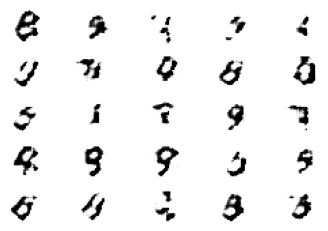

In [ ]:
# ### generate points in latent space as input for the generator
### You may fill the blanks of dots ###

latent_points = generate_latent_points(latent_dim=100, n_samples=25) # 100 (hint:latent_dim), 25 (hint: num of samples)
# ### generate images
X = g_model.predict(latent_points)
# ### create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
# 	### plot images
  for i in range(n * n):
# 		### define subplot
    pyplot.subplot(n, n, 1 + i)
# 		### turn off axis
    pyplot.axis('off')
# 		### plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
  pyplot.show()
 
save_plot(X, 5)

### 1.5 - Plot the generated samples ##

**Tasks:**
1. Train the GAN model for more epochs, i.e.,**10 epochs** and check the performance on the model. **(10 bonus Points)**
2. Plot the 5 * 5 = 25 outputs of the trained generator - 10 epochs. **(5 bonus Points)**

**Hints:**
1. The output samples could be like, but not exactly same as:
![image.png](attachment:image.png)


epoch: 1, iter: 1/234, discriminator loss: 0.683, generator loss: 0.755
epoch: 1, iter: 2/234, discriminator loss: 0.671, generator loss: 0.780
epoch: 1, iter: 3/234, discriminator loss: 0.665, generator loss: 0.795
epoch: 1, iter: 4/234, discriminator loss: 0.657, generator loss: 0.813
epoch: 1, iter: 5/234, discriminator loss: 0.652, generator loss: 0.829
epoch: 1, iter: 6/234, discriminator loss: 0.646, generator loss: 0.845
epoch: 1, iter: 7/234, discriminator loss: 0.643, generator loss: 0.848
epoch: 1, iter: 8/234, discriminator loss: 0.641, generator loss: 0.858
epoch: 1, iter: 9/234, discriminator loss: 0.640, generator loss: 0.850
epoch: 1, iter: 10/234, discriminator loss: 0.639, generator loss: 0.841
epoch: 1, iter: 11/234, discriminator loss: 0.641, generator loss: 0.822
epoch: 1, iter: 12/234, discriminator loss: 0.650, generator loss: 0.797
epoch: 1, iter: 13/234, discriminator loss: 0.654, generator loss: 0.769
epoch: 1, iter: 14/234, discriminator loss: 0.658, generator

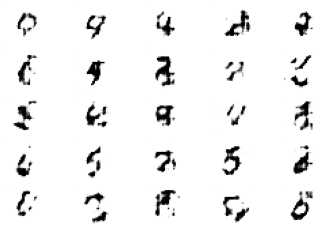

In [ ]:
### train with n_epochs=10, n_batch=256
### You may fill the blanks of dots ###

keras.backend.clear_session() # Clear cached model
### create the discriminator ###
d_model = define_discriminator()
### create the generator ###
g_model = define_generator(latent_dim)
### create the gan ###
gan_model = define_gan(g_model, d_model) # g_model, d_model
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=10, n_batch=256)
summarize_performance(g_model, d_model, dataset, latent_dim)

# ### generate points in latent space as input for the generator
latent_points = generate_latent_points(latent_dim=100, n_samples=25) # 100 (hint:latent_dim), 25 (hint: num of samples)
# ### generate images
X = g_model.predict(latent_points)
# ### create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
  for i in range(n * n): ## plot images
    pyplot.subplot(n, n, 1 + i) ## define subplot
    pyplot.axis('off') ## turn off axis
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r') ## plot raw pixel data
  pyplot.show()
 
save_plot(X, 5)
